#Chargement des données 

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("5G_energy_consumption_dataset.csv")


In [ ]:
# Explorations des données 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [7]:
df.describe().T

count       mean        std       min        25%        50%  \
Energy   92629.0  28.138997  13.934645  0.747384  18.236173  24.065770   
load     92629.0   0.244705   0.234677  0.000000   0.057370   0.165550   
ESMODE   92629.0   0.081361   0.382317  0.000000   0.000000   0.000000   
TXpower  92629.0   6.765427   0.309929  5.381166   6.427504   6.875934   

               75%         max  
Energy   35.724963  100.000000  
load      0.363766    0.993957  
ESMODE    0.000000    4.000000  
TXpower   6.875934    8.375336

In [10]:
df.head()

Time   BS     Energy      load  ESMODE   TXpower
0  20230101 010000  B_0  64.275037  0.487936     0.0  7.101719
1  20230101 020000  B_0  55.904335  0.344468     0.0  7.101719
2  20230101 030000  B_0  57.698057  0.193766     0.0  7.101719
3  20230101 040000  B_0  55.156951  0.222383     0.0  7.101719
4  20230101 050000  B_0  56.053812  0.175436     0.0  7.101719

In [13]:
df.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

In [22]:
df["Time"] = pd.to_datetime(df["Time"],format='%Y%m%d %H%M%S')

In [23]:
df.head()

Time   BS     Energy      load  ESMODE   TXpower
0 2023-01-01 01:00:00  B_0  64.275037  0.487936     0.0  7.101719
1 2023-01-01 02:00:00  B_0  55.904335  0.344468     0.0  7.101719
2 2023-01-01 03:00:00  B_0  57.698057  0.193766     0.0  7.101719
3 2023-01-01 04:00:00  B_0  55.156951  0.222383     0.0  7.101719
4 2023-01-01 05:00:00  B_0  56.053812  0.175436     0.0  7.101719

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     92629 non-null  datetime64[ns]
 1   BS       92629 non-null  object        
 2   Energy   92629 non-null  float64       
 3   load     92629 non-null  float64       
 4   ESMODE   92629 non-null  float64       
 5   TXpower  92629 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 4.2+ MB


In [ ]:
# Transformation des données 

In [ ]:
df['Month'] = df['Time'].dt.month
df['DayOfWeek'] = df['Time'].dt.dayofweek
df['Hour'] = df['Time'].dt.hour
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["BS_encoded"] = le.fit_transform(df["BS"])

In [28]:
df.head()


Time   BS     Energy      load  ESMODE   TXpower  BS_encoded  \
0 2023-01-01 01:00:00  B_0  64.275037  0.487936     0.0  7.101719           0   
1 2023-01-01 02:00:00  B_0  55.904335  0.344468     0.0  7.101719           0   
2 2023-01-01 03:00:00  B_0  57.698057  0.193766     0.0  7.101719           0   
3 2023-01-01 04:00:00  B_0  55.156951  0.222383     0.0  7.101719           0   
4 2023-01-01 05:00:00  B_0  56.053812  0.175436     0.0  7.101719           0   

   Month  DayOfWeek  Hour  IsWeekend  
0      1          6     1          1  
1      1          6     2          1  
2      1          6     3          1  
3      1          6     4          1  
4      1          6     5          1

In [29]:
df.drop(columns=['Time', 'BS'], inplace=True)

In [30]:
df.head()

Energy      load  ESMODE   TXpower  BS_encoded  Month  DayOfWeek  Hour  \
0  64.275037  0.487936     0.0  7.101719           0      1          6     1   
1  55.904335  0.344468     0.0  7.101719           0      1          6     2   
2  57.698057  0.193766     0.0  7.101719           0      1          6     3   
3  55.156951  0.222383     0.0  7.101719           0      1          6     4   
4  56.053812  0.175436     0.0  7.101719           0      1          6     5   

   IsWeekend  
0          1  
1          1  
2          1  
3          1  
4          1

In [34]:
from ydata_profiling import ProfileReport 
df_profile = ProfileReport(df,title="Profile Report 5G_energy_consummation")
df_profile.to_notebook_iframe()
df_profile.to_file("rapport_5G_energy.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 44.18it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
df.head()

Energy      load  ESMODE   TXpower  BS_encoded  Month  DayOfWeek  Hour  \
0  64.275037  0.487936     0.0  7.101719           0      1          6     1   
1  55.904335  0.344468     0.0  7.101719           0      1          6     2   
2  57.698057  0.193766     0.0  7.101719           0      1          6     3   
3  55.156951  0.222383     0.0  7.101719           0      1          6     4   
4  56.053812  0.175436     0.0  7.101719           0      1          6     5   

   IsWeekend  
0          1  
1          1  
2          1  
3          1  
4          1

In [ ]:
# Phase de séparation de l'ensemble de données en ensembles d'entraînement et de preparation du choix de l'algorithme

In [41]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

cible = 'Energy'
caracteristiques = [col for col in df.columns if col != cible]

X = df[caracteristiques]
y = df[cible]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso_cv = LassoCV(random_state=0)  # pas de cv explicitement fixé
lasso_cv.fit(X_scaled, y)

print("Alpha optimal :", lasso_cv.alpha_)


Alpha optimal : 0.16789849181001562


In [42]:
import pandas as pd

coeffs = pd.Series(lasso_cv.coef_, index=caracteristiques)
variables_retenues = coeffs[coeffs != 0]
print("Variables retenues :", list(variables_retenues.index))

Variables retenues : ['load', 'ESMODE', 'TXpower', 'BS_encoded', 'DayOfWeek']


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso 

X_train , X_test , y_train , y_test = train_test_split(X_scaled,y, test_size=0.2 , random_state=42)

model = Lasso(alpha=0.1679)  # tu peux ajuster alpha
model.fit(X_train, y_train)


Lasso(alpha=0.1679)

In [52]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² :", r2)
print("RMSE :", rmse)


R² : 0.5486284069570584
RMSE : 9.255979049362093


In [54]:
import pandas as pd

coef = model.coef_
features = pd.Series(coef, index=[col for col in df.columns if col != 'Energy'])

print("Variables sélectionnées (coefficients non nuls) :")
print(features[features != 0])


Variables sélectionnées (coefficients non nuls) :
load          7.342833
ESMODE       -2.378011
TXpower       4.846470
BS_encoded   -0.456718
DayOfWeek     0.041918
dtype: float64


In [ ]:
# Visualisation

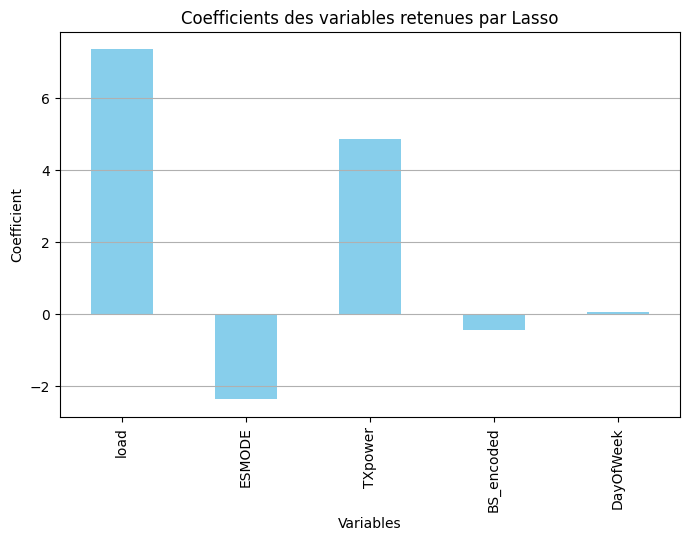

In [56]:
import matplotlib.pyplot as plt

# Visualisation des coefficients non nuls
features = pd.Series(model.coef_, index=[col for col in df.columns if col != 'Energy'])
features_non_nuls = features[features != 0]

plt.figure(figsize=(8,5))
features_non_nuls.plot(kind='bar', color='skyblue')
plt.title("Coefficients des variables retenues par Lasso")
plt.ylabel("Coefficient")
plt.xlabel("Variables")
plt.grid(axis='y')
plt.show()


In [ ]:
# Interpretation 

In [ ]:
load a un coefficient positif fort ; plus la charge augmente, plus la consommation énergétique augmente.

ESMODE a un coefficient négatif ; cette variable impacte la consommation à la baisse, selon sa définition.

TXpower coefficient positif ; la puissance d’émission augmente l’énergie consommée.

BS_encoded coefficient négatif faible ; le type de station de base (après encodage) a un effet léger de réduction.

DayOfWeek coefficient positif faible ; le jour de la semaine a un effet faible mais présent.